In [1]:
%matplotlib inline

In [2]:
import os
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pylab import savefig
path="C:/Users/danie/Documents/GitHub/OlgaDanCapstone/GPUProject"
os.chdir(path)

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

In [3]:
%%time
train=np.load('data.npy')

Wall time: 2.98 s


In [9]:
# n_samples, n_features

X_train=train[0:150000,0].astype(np.float32)
X_train=X_train.reshape(-1, 1)

y_train=train[0:150000,1].astype(np.float32)
y_train=y_train.reshape(-1, 1)

In [10]:
X_train.shape

(150000, 1)

In [11]:
X_test=train[150000:300000,0].astype(np.float32)
X_test=X_test.reshape(-1,1)

y_test=train[150000:300000,1].astype(np.float32)
y_test=y_test.reshape(-1, 1)

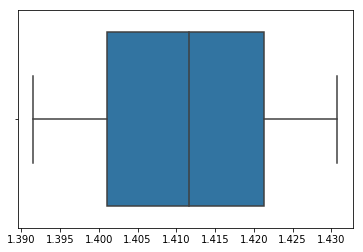

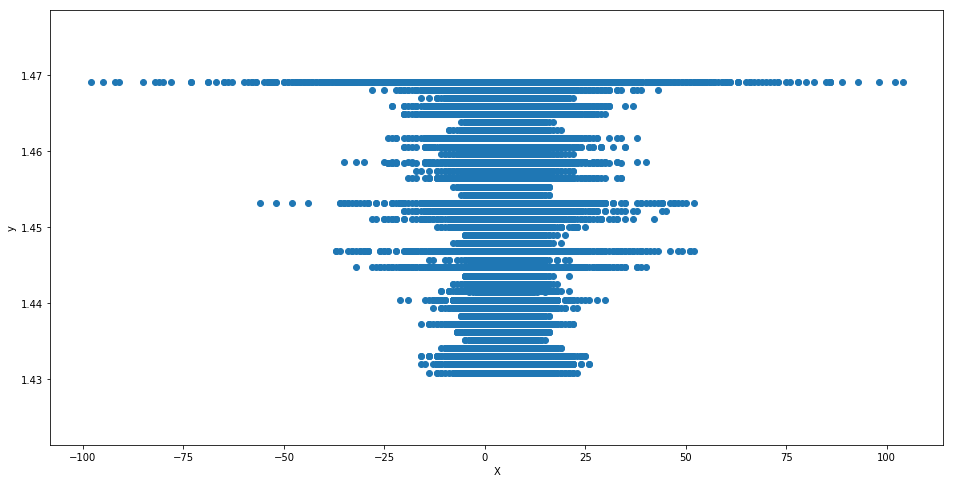

In [13]:
import seaborn as sns
sns.boxplot(x=y_test)
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train, y_train)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()